In [3]:
#importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

In [4]:
#loading the well log data file
train_data=pd.read_csv('train.csv',sep=';')

In [5]:
#let's have a look at our data
train_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [6]:
train_data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [7]:
train_data.tail()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0
1170510,7/1-2 S,3169.9204,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.294910,NaN,NaN,...,25.985943,NaN,NaN,-0.011398,NaN,NaN,27.342442,NaN,65030,2.0


In [8]:
train_data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [9]:
#let's see what are the columns in our csv file
train_data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [10]:
#let's see a little description of all the features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
WELL                                 1170511 non-null object
DEPTH_MD                             1170511 non-null float64
X_LOC                                1159736 non-null float64
Y_LOC                                1159736 non-null float64
Z_LOC                                1159736 non-null float64
GROUP                                1169233 non-null object
FORMATION                            1033517 non-null object
CALI                                 1082634 non-null float64
RSHA                                 630650 non-null float64
RMED                                 1131518 non-null float64
RDEP                                 1159496 non-null float64
RHOB                                 1009242 non-null float64
GR                                   1170511 non-null float64
SGR                                  69353 non-null float64
NPHI                     

In [11]:
def plot_logs(data):
    #sort data by depth
    data = data.sort_values(by = 'DEPTH_MD')
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 12))
    ax[0].plot(data['RHOB'], data['DEPTH_MD'], '-g')
    ax[1].plot(data['NPHI'], data['DEPTH_MD'], '-b')
    ax[2].plot(data['DTS'], data['DEPTH_MD'], '-', color='0.5')
    ax[3].plot(data['GR'], data['DEPTH_MD'], '-', color='r')
    ax[4].plot(data['DTC'], data['DEPTH_MD'], '-', color='black')
    
    #lets add labels for the x-axis
    ax[0].set_xlabel("RHOB")
    ax[0].set_xlim(data['RHOB'].min(),data['RHOB'].max())
    ax[1].set_xlabel("NPHI")
    ax[1].set_xlim(data['NPHI'].min(),data['NPHI'].max())
    ax[2].set_xlabel("DTS")
    ax[2].set_xlim(data['DTS'].min(),data['DTS'].max())
    ax[3].set_xlabel("GR")
    ax[3].set_xlim(data['GR'].min(),data['GR'].max())
    ax[4].set_xlabel("DTC")
    ax[4].set_xlim(data['DTC'].min(),data['DTC'].max())

    #add label to the y-axis
    ax[0].set_ylabel('DEPTH_MD')

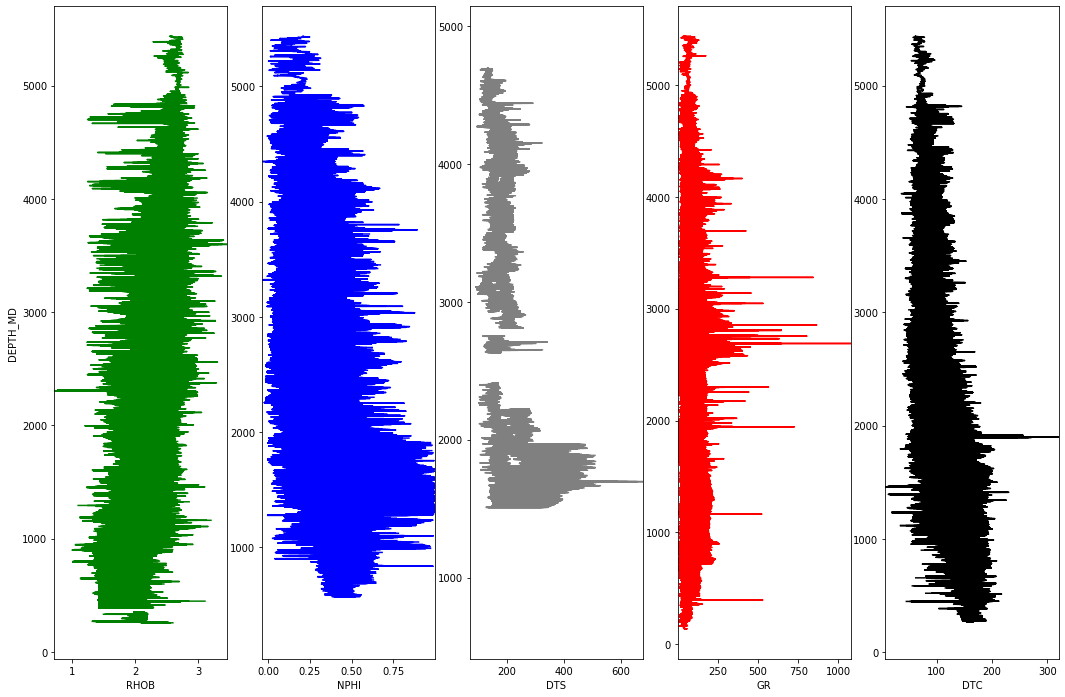

In [12]:
plot_logs(train_data)

# Mapping of lithology to integer labels

### 0-> SandStone(0-30000),
### 1-> Shale(65000-65030),
### 2-> Limestone(70000-74000),
### 3-> Coal(80000-99000),

In [13]:
# map of lithology to integer label
criteria1 = [train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(0, 30000),
             train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(65000, 65030),
             train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(70000, 74000),
             train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].between(80000, 99000)]
values = [0,1, 2, 3]


train_data['LITHO_NUMBER']=np.select(criteria1, values, 0)

In [14]:
train_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITHO_NUMBER
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,1
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,1
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,1
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,1
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0,0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0,1
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0,1
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0,1


In [15]:
#So,Now we have a new column LITHO_NUMBERS
train_data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'LITHO_NUMBER'],
      dtype='object')

# Correlations

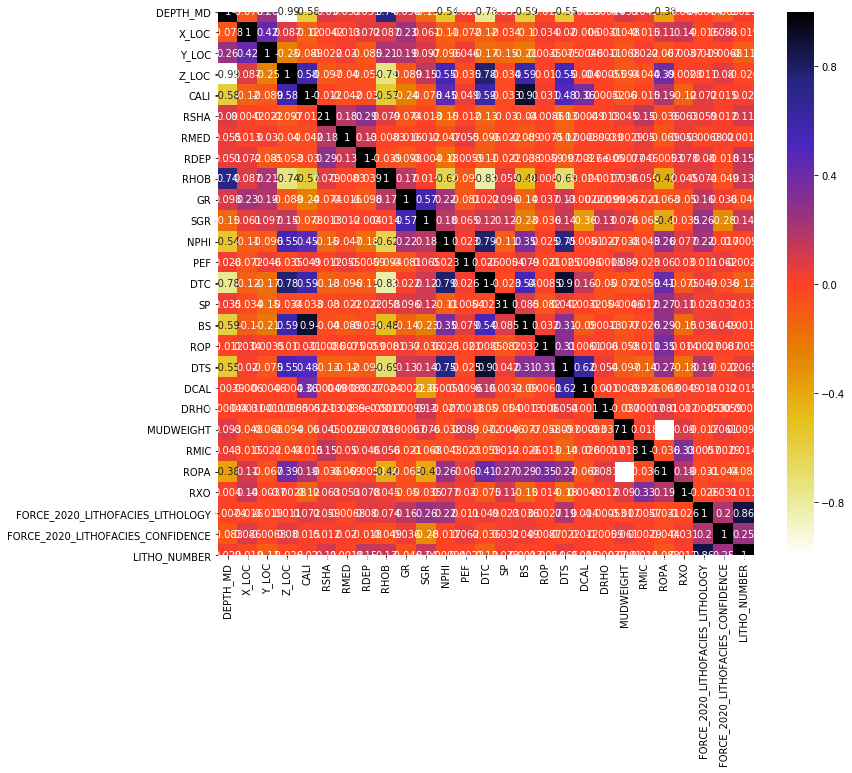

In [16]:
#here we have a lots of features let's try to minimise them
import seaborn as sns
plt.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [17]:

#So let's drop extra features and keep RHOB,GR,NPHI,DTC,DTS,LITHO_NUMBER
train_data=train_data.drop(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'SGR', 'PEF', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],axis=1)
train_data

,RHOB,GR,NPHI,DTC,DTS,LITHO_NUMBER
0,1.884186,80.200851,NaN,161.131180,NaN,1
1,1.889794,79.262886,NaN,160.603470,NaN,1
2,1.896523,74.821999,NaN,160.173615,NaN,1
3,1.891913,72.878922,NaN,160.149429,NaN,1
4,1.880034,71.729141,NaN,160.128342,NaN,1
...,...,...,...,...,...,...
1170506,2.527984,77.654900,NaN,NaN,NaN,0
1170507,2.537613,75.363937,NaN,NaN,NaN,1
1170508,2.491860,66.452843,NaN,NaN,NaN,1
1170509,2.447539,55.784817,NaN,NaN,NaN,1


In [18]:
train_data.count()

RHOB            1009242
GR              1170511
NPHI             765409
DTC             1089648
DTS              174613
LITHO_NUMBER    1170511
dtype: int64

So,we can see there are a lot of missing values

# Removing the rows with missing values

In [19]:
#let's remove the rows having missing values
train_data=train_data.dropna()
train_data

,RHOB,GR,NPHI,DTC,DTS,LITHO_NUMBER
90145,2.269236,70.982765,0.509389,81.404381,158.274597,2
90146,2.420680,65.994087,0.366960,80.295700,156.922211,2
90147,2.331994,66.565147,0.289407,79.370796,155.774643,2
90148,2.328588,67.719505,0.269194,79.169151,155.365829,2
90149,2.321023,66.386986,0.292627,79.796066,155.508820,2
...,...,...,...,...,...,...
1170442,2.327454,30.693535,0.165856,102.210472,127.072151,0
1170443,2.365172,32.359882,0.174907,102.637398,127.075340,0
1170444,2.386400,36.232948,0.182118,102.694748,127.075317,0
1170445,2.362845,41.044968,0.176795,102.095695,127.066879,0


In [20]:
train_data.count()
#Now,we have no missing values

RHOB            153675
GR              153675
NPHI            153675
DTC             153675
DTS             153675
LITHO_NUMBER    153675
dtype: int64

In [21]:
import seaborn as sns

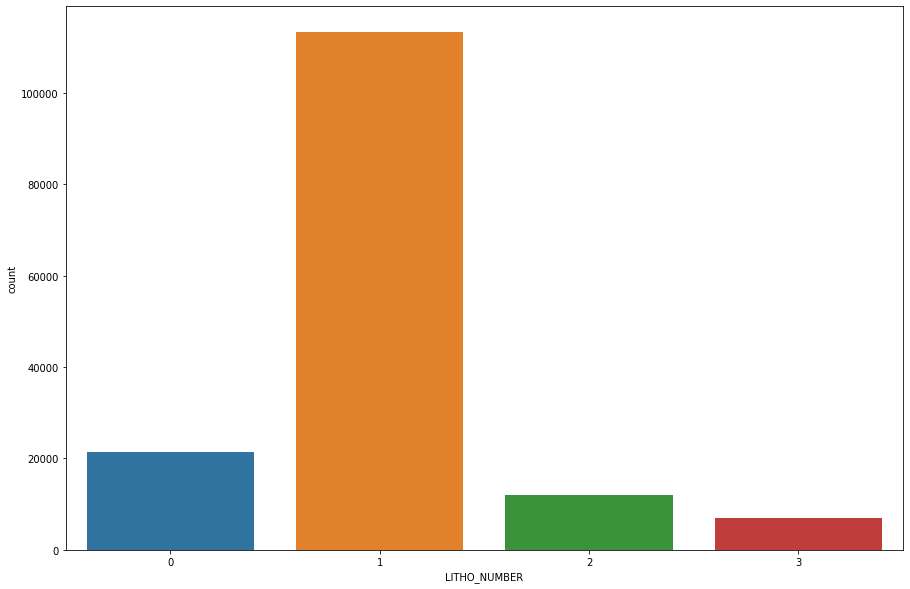

In [22]:
#visualizing the count of each lithology number
fig = plt.figure(figsize = (15,10))
plot = sns.countplot(x="LITHO_NUMBER", data=train_data)

# Decision Tree Classifier

In [23]:
#importing required librarires
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

### Train and test data split

In [24]:
#making the x and y of our data
x_data = train_data.drop(columns = ['LITHO_NUMBER'])
y_data = train_data['LITHO_NUMBER']

#splitting the dataset for training and testing purpose
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 42)

In [25]:
#scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
#Decision Tree Model

DTclassifier = DecisionTreeClassifier()

DTclassifier.fit(x_train, y_train)
y_pred_DT = DTclassifier.predict(x_test)

In [27]:
#checking the accuracy score
print(classification_report(y_test, y_pred_DT))
print('Best accuracy score by Decision Tree is', accuracy_score(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6462
           1       0.93      0.93      0.93     34048
           2       0.68      0.68      0.68      3529
           3       0.54      0.55      0.55      2064

    accuracy                           0.87     46103
   macro avg       0.73      0.74      0.73     46103
weighted avg       0.87      0.87      0.87     46103

Best accuracy score by Decision Tree is 0.8735223304340282


### Hyperparameter Tuning

In [28]:
#let's do hyperparameters tuning to check the best values of our parameters for a better accuracy score
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[5,10,20,30,40,50,100,None],
    "max_features":[1,2,3,4,None],
    "min_samples_leaf":[1,2,3,5],
    "min_samples_split":[2,5,10]
}

In [29]:
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(DTclassifier,param_grid=param_dist,cv=10,n_jobs=-1)

In [30]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 30, 40, 50, 100, None],
    

In [31]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
#best values for the parameters
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [33]:
#now, the accuracy is
grid.best_score_

0.8895530435429294

In [34]:
from joblib import dump,load
dump(DTclassifier, 'DecisionTree.pkl', compress=9)

['DecisionTree.pkl']

In [39]:
DTclassifier = load('DecisionTree.pkl')
features = np.array([[ 2.327454,30.693535,0.165856,102.210472,127.072151]])
DTclassifier.predict(features)

array([2])